In [1]:
! pip install fuzzywuzzy


In [2]:
#Connect to our own Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd "/content/gdrive/My Drive/ProjetNLPQuora/"
!ls


/content/gdrive/My Drive/ProjetNLPQuora
bert-master  cache  embq1.csv  model_w2c_6.h5  test.csv  train.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy import genfromtxt
from fuzzywuzzy import fuzz
from matplotlib import pyplot as plt



df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# CLEANING TO COMPUTE EMBEDDINGS NOT NECESSARY IF WE ALREADY COMPUTED THEM
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)

df_train["question1"] = df_train["question1"].astype("str")
df_train["question2"] = df_train["question2"].astype('str')

q1 = df_train['question1'].tolist()
q2 = df_train['question2'].tolist()

labels = df_train['is_duplicate']

In [32]:
print(len(q1), len(labels))

404287 404287


In [45]:
score_token_set =[]
for i in range(len(q1)):
  score_token_set.append(fuzz.token_set_ratio(q1[i],q2[i]))
  if (i%50000 ==0):
    print(i*100/len(q1))

0.0
12.367451834958828
24.734903669917657
37.102355504876485
49.46980733983531
61.83725917479414
74.20471100975297
86.5721628447118
98.93961467967063


In [46]:
score_ratio =[]
for i in range(len(q1)):
  score_ratio.append(fuzz.ratio(q1[i],q2[i]))
  if (i%50000 ==0):
    print(i*100/len(q1))

0.0
12.367451834958828
24.734903669917657
37.102355504876485
49.46980733983531
61.83725917479414
74.20471100975297
86.5721628447118
98.93961467967063


In [53]:
score_partial_ratio =[]
for i in range(len(q1)):
  score_partial_ratio.append(fuzz.partial_ratio(q1[i],q2[i]))
  if (i%50000 ==0):
    print(i*100/len(q1))

0.0
12.367451834958828
24.734903669917657
37.102355504876485
49.46980733983531
61.83725917479414
74.20471100975297
86.5721628447118
98.93961467967063


maximal treshold : 79 accuracy :  0.6647554831097711


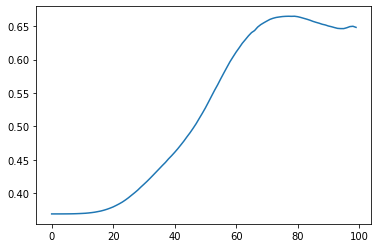

In [48]:
th1 = []
for i in range(100):
  t = i
  pred = (np.asarray(score_token_set)>t)*1 
  th1.append(sum(labels== pred)/len(labels))
plt.plot(th1)

optimal_th = np.argmax(th1)
print('maximal treshold :' ,optimal_th, 'accuracy : ', max(th1))

maximal treshold : 59 accuracy :  0.6685448703520024


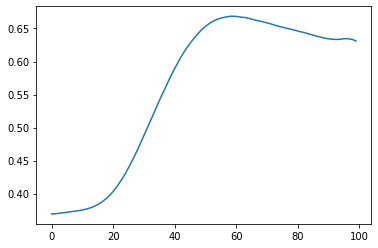

In [51]:
th2 = []
for i in range(100):
  t = i
  pred = (np.asarray(score_ratio)>t)*1 
  th2.append(sum(labels== pred)/len(labels))
plt.plot(th2)

optimal_th = np.argmax(th2)
print('maximal treshold :' ,optimal_th, 'accuracy : ', max(th2))

maximal treshold : 65 accuracy :  0.6625046068758085


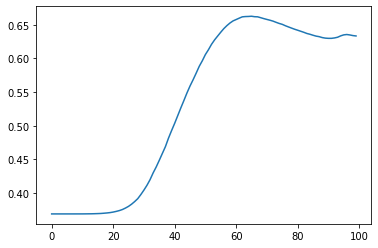

In [54]:
th3 = []
for i in range(100):
  t = i
  pred = (np.asarray(score_partial_ratio)>t)*1 
  th3.append(sum(labels== pred)/len(labels))
plt.plot(th3)

optimal_th = np.argmax(th3)
print('maximal treshold :' ,optimal_th, 'accuracy : ', max(th3))